***Overview:***
In the telecom industry, customer churn is a critical metric affecting profitability. The goal is to build a classifier capable of predicting whether a SyriaTel customer is likely to churn. This is a binary classification problem, with the telecom business being the primary audience. By understanding the patterns that precede churn, SyriaTel can implement targeted strategies to retain customers, ultimately reducing financial losses.



In [552]:

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import numpy as np
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split


#Sampling
from collections import Counter
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Logistic Regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Naive Bayes
from scipy import stats

# Decision Trees
from math import log #to calculate entropy
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

# Regression with CART Trees
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Random Forest
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# GridSearch
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
# Gradient Boosting
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# SVM
from sklearn import svm
from sklearn.svm import SVC
import statsmodels as sm


# Pipelines
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [553]:
import pandas as pd

class ChurnDataProcessor:
    def __init__(self, data_path):
        self.df = pd.read_csv(data_path)

    def display_dataset_info(self):
        # Display basic information about the dataset
        print("Dataset Information:")
        print(self.df.info())

    def describe_numeric_columns(self):
        # Display statistical description of numeric columns
        print("\nStatistical Description of Numeric Columns:")
        return self.df.describe()

    def display_dataset_shape(self):
        # Display the shape of the dataset
        print("\nDataset Shape:")
        print(self.df.shape)

data_path = 'bigml_59c28831336c6604c800002a.csv'
# Create an instance of ChurnDataProcessor
processor = ChurnDataProcessor(data_path)
# Display the head of the dataset
processor.df.head()



,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


NonChurn and Churn Customer Numbers:
 churn
False    2850
True      483
Name: count, dtype: int64
NonChurn and Churn Customer Percentage:
 churn
False    0.86
True     0.14
Name: proportion, dtype: float64


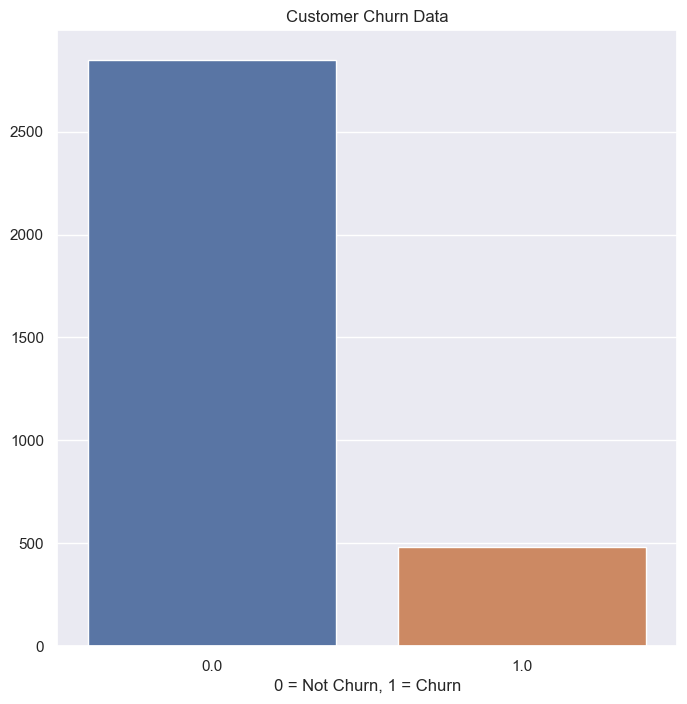

In [554]:
import matplotlib.pyplot as plt
import seaborn as sns
df1 = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
# Assuming 'df' is your DataFrame and 'churn' is a column indicating churn (0 or 1)
churn_counts = df['churn'].round().value_counts()
print('NonChurn and Churn Customer Numbers:\n', df['churn'].value_counts())
print('NonChurn and Churn Customer Percentage:\n', round(df['churn'].value_counts(normalize=True),2))
churn  = round(df['churn']).value_counts()
plt.figure(figsize=(8, 8))
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Customer Churn Data')
plt.xlabel('0 = Not Churn, 1 = Churn')
plt.show()


international plan  churn
no                  False    0.89
                    True     0.11
yes                 False    0.58
                    True     0.42
Name: proportion, dtype: float64


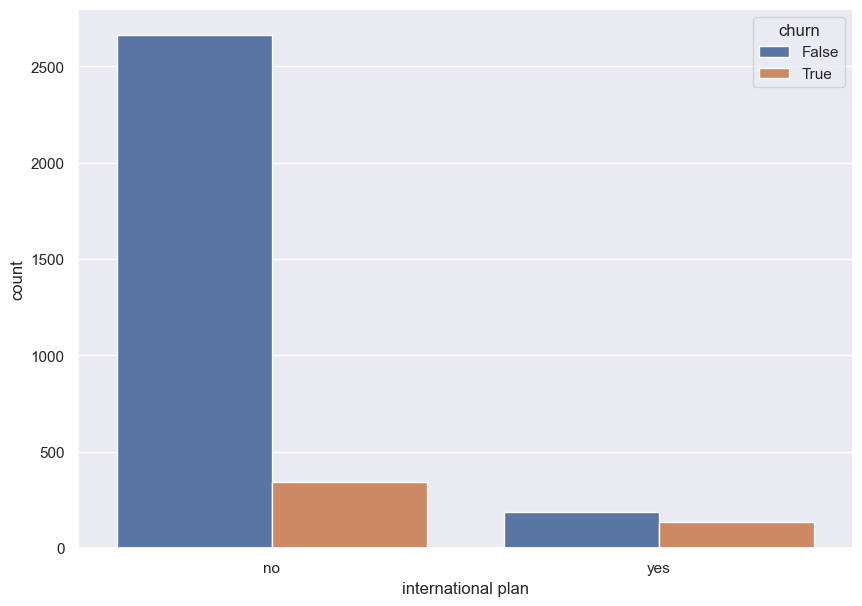

In [555]:
sns.countplot(x='international plan', hue='churn', data=df1);
print(round(df1.groupby('international plan')['churn'].value_counts(normalize=True),2))

In [556]:
# Display basic information about the dataset
processor.display_dataset_info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls  

In [557]:
# Display statistical description of numeric columns
processor.describe_numeric_columns()



Statistical Description of Numeric Columns:


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [558]:
# Display the shape of the dataset
processor.display_dataset_shape()


Dataset Shape:
(3333, 21)


In [559]:
class ChurnDataCleaner(ChurnDataProcessor):
    def check_missing_values(self):
        # Check for missing values in each column
        missing_values = self.df.isnull().sum()
        print("\nMissing Values in Each Column:")
        print(missing_values)
        
    def check_duplicates(self):
        # Check for duplicates in the entire dataset
        duplicates = self.df.duplicated().sum()
        print("\nNumber of Duplicates in the Dataset:", duplicates)
        
    def drop_columns(self, columns_to_drop):
        # Drop specified columns
        self.df = self.df.drop(columns=columns_to_drop, axis=1)
        return self.df
    
    def encode_categorical_variables(self, categorical_columns):
        # One-hot encode categorical variables
        self.df = pd.get_dummies(self.df, columns=categorical_columns)
        return self.df
    
    def check_class_imbalance(self, target_column):
        # Check for class imbalance and display distribution
        class_distribution = self.df[target_column].value_counts()
        print(f"\nClass Distribution for '{target_column}':")
        print(class_distribution)
        plt.figure(figsize=(8, 6))
        sns.countplot(x=target_column, data=self.df)
        plt.title(f'Distribution of {target_column}')
        plt.show()

    def handle_class_imbalance(self, target_column):
        # Handle class imbalance using SMOTE
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(self.df.drop(columns=[target_column]), self.df[target_column])
        self.df = pd.concat([X_resampled, y_resampled], axis=1)

    def map_columns(self, column, mapping_dict):
        # Map values in a column using a dictionary
        self.df[column] = self.df[column].map(mapping_dict)
        print(self.df[column])
    
    def print_unique_values(self):
        # Print unique values in each column
        for column in self.df.columns:
            unique_values = self.df[column].unique()
            print(f"{column} unique values: {unique_values}")
    
    def visualize_outliers(self, outlier_columns):
        # Visualize potential outliers using box plots
        plt.figure(figsize=(16, 10))
        for i, column in enumerate(outlier_columns, 1):
            plt.subplot(3, 5, i)
            sns.boxplot(x=self.df[column])
            plt.title(f'Box Plot of {column}')

        plt.tight_layout()
        plt.show()
    
    #def drop_outliers(self, columns, z_threshold=3):
        # Drop outliers based on Z-score
        #for column in columns:
            #z_scores = np.abs((self.df[column] - self.df[column].mean()) / self.df[column].std())
            #self.df = self.df[(z_scores < z_threshold)]
    def drop_outliers(self, outlier_columns):
        # Identify and drop outliers in the specified columns
        for column in outlier_columns:
            Q1 = self.df[column].quantile(0.25)
            Q3 = self.df[column].quantile(0.75)
            IQR = Q3 - Q1

            # Define the upper and lower bounds to identify outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Identify and drop outliers
            outliers = (self.df[column] < lower_bound) | (self.df[column] > upper_bound)
            self.df = self.df[~outliers]

        # Drop rows with missing values after removing outliers
        self.df = self.df.dropna()
        

    def scale_and_split(self, target_column, test_size=0.2, random_state=42):
        # Split the dataset into features (X) and target variable (y)
        X = self.df.drop(columns=[target_column])
        y = self.df[target_column]

        # Scale the features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=random_state)

        return X_train, X_test, y_train, y_test
    
    def print_data_shape(self):
        # Print the shape of the DataFrame
        print("Shape of the DataFrame:", self.df.shape)
    def correlation_map(self):
        # Create figure and axes and set figure size
        f, ax = plt.subplots(figsize=(20,10))
        return sns.heatmap(data=df.corr(), annot=False)
columns_to_drop = ['state', 'phone number']
categorical_columns = ['international plan', 'voice mail plan']
churn_mapping = {False: 0, True: 1}
outlier_columns = ['total day minutes', 'total day calls', 'total day charge',
                   'total eve minutes', 'total eve calls', 'total eve charge',
                   'total night minutes', 'total night calls', 'total night charge',
                   'total intl minutes', 'total intl calls', 'total intl charge',
                   'customer service calls']
# Create an instance of ChurnDataCleaner
cleaner = ChurnDataCleaner(data_path)

In [560]:
# Display basic information about the dataset
cleaner.display_dataset_info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls  

In [561]:
# Display statistical description of numeric columns
cleaner.describe_numeric_columns()



Statistical Description of Numeric Columns:


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [562]:
# Display the shape of the dataset
cleaner.display_dataset_shape()


Dataset Shape:
(3333, 21)


In [563]:
# Check missing values
cleaner.check_missing_values()


Missing Values in Each Column:
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [564]:
# Check for duplicates
cleaner.check_duplicates()


Number of Duplicates in the Dataset: 0


In [565]:
# Drop specified columns
cleaner.drop_columns(columns_to_drop)


,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [566]:
# One-hot encode specified categorical columns
cleaner.encode_categorical_variables(categorical_columns)

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,11.01,10.0,3,2.70,1,False,True,False,False,True
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,11.45,13.7,3,3.70,1,False,True,False,False,True
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,7.32,12.2,5,3.29,0,False,True,False,True,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,8.86,6.6,7,1.78,2,False,False,True,True,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,8.41,10.1,3,2.73,3,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,...,12.56,9.9,6,2.67,2,False,True,False,False,True
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,...,8.61,9.6,4,2.59,3,False,True,False,True,False
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,...,8.64,14.1,6,3.81,2,False,True,False,True,False
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,...,6.26,5.0,10,1.35,2,False,False,True,True,False


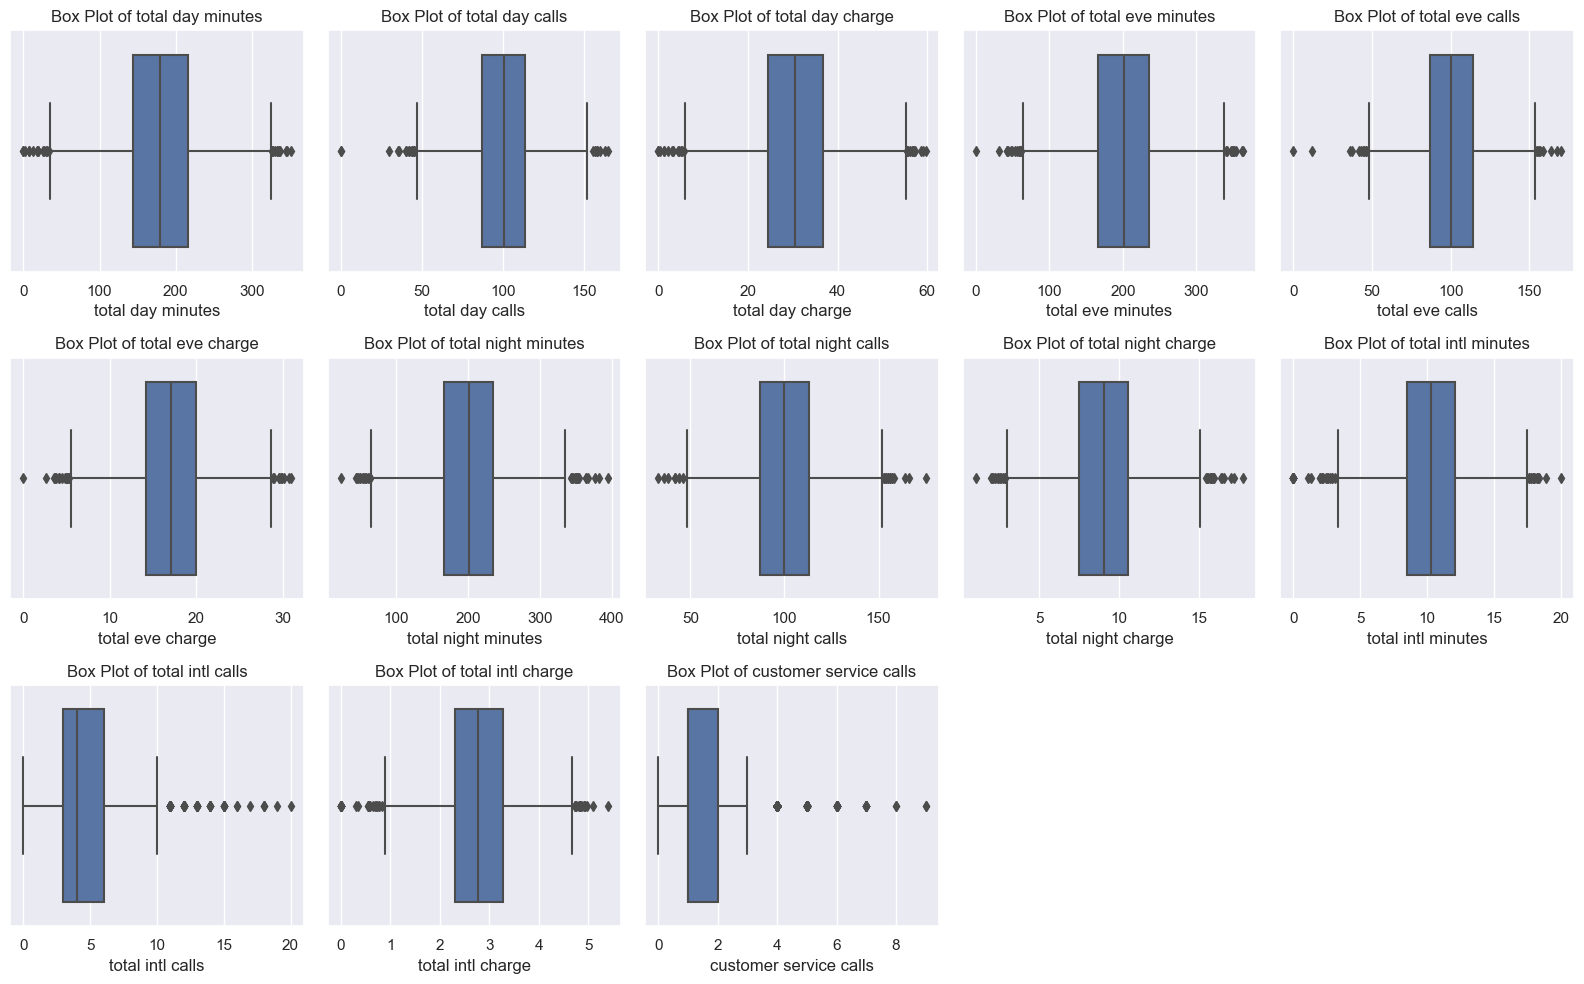

In [567]:
# Visualize potential outliers
cleaner.visualize_outliers(outlier_columns)

In [568]:
# Drop the outliers
#cleaner.drop_outliers(columns=outlier_columns)
cleaner.drop_outliers(outlier_columns)

In [569]:
# Map specified columns
cleaner.map_columns('churn', churn_mapping)

0       0
1       0
2       0
4       0
5       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 2815, dtype: int64


In [570]:
unique_area_codes = cleaner.df['area code'].unique()
print("Unique Area Codes:", unique_area_codes)


Unique Area Codes: [415 510 408]


In [571]:
# Scale and split the data
#target_column = 'churn'
#X_train, X_test, y_train, y_test = cleaner.scale_and_split(target_column)

In [572]:
cleaner = ChurnDataCleaner(data_path)
cleaner.print_unique_values()

state unique values: ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
account length unique values: [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13

In [573]:
cleaner.print_data_shape()

Shape of the DataFrame: (3333, 21)


In [574]:
import pandas as pd
#df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
class ChurnDataAnalyzer(ChurnDataCleaner):
    def exploratory_data_analysis(self, target_column):
        # Display basic statistics
        print("\nBasic Statistics:")
        print(self.df.describe())

        # Visualize the distribution of the target variable
        plt.figure(figsize=(8, 6))
        sns.countplot(x=target_column, data=self.df)
        plt.title(f'Distribution of {target_column}')
        plt.show()

        # Visualize correlation matrix for numeric columns
        numeric_columns = self.df.select_dtypes(include=[np.number]).columns
        plt.figure(figsize=(12, 10))
        correlation_matrix = self.df[numeric_columns].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Matrix')
        plt.show()



Basic Statistics:
       account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.0690

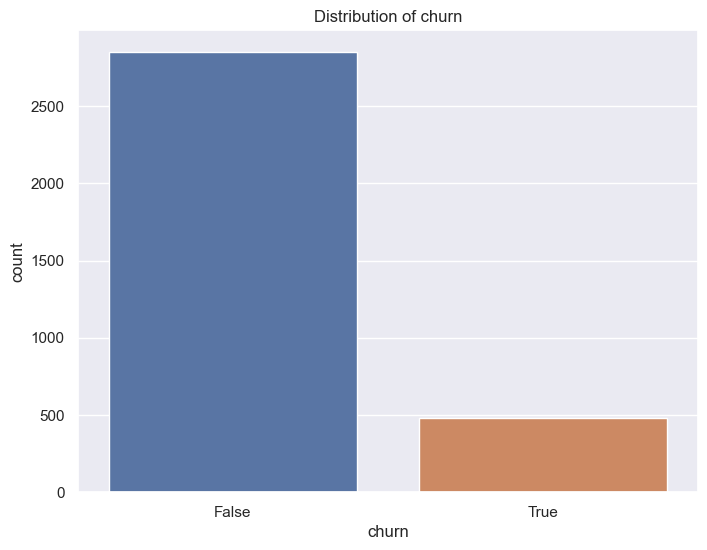

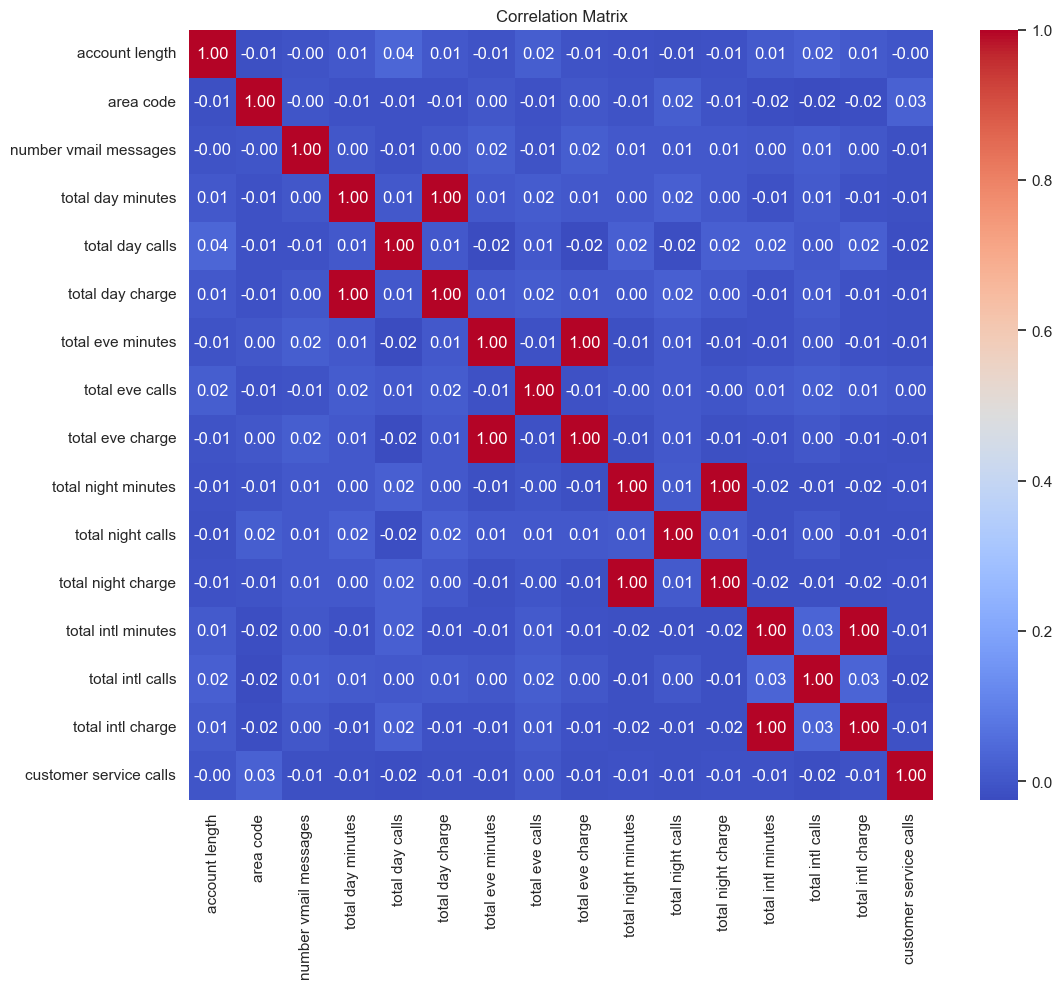

In [575]:
analyzer = ChurnDataAnalyzer(data_path)
analyzer.exploratory_data_analysis(target_column='churn')

In [576]:
# 1. Handling Categorical Variables (One-Hot Encoding)
categorical_cols = ['state', 'international plan', 'voice mail plan']
df_categorical = df[categorical_cols]
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = pd.DataFrame(encoder.fit_transform(df_categorical), columns=encoder.get_feature_names_out(categorical_cols))

encoded_categorical


,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3331,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [577]:
#Train-Test Split
target_column = 'churn'
X = df_final.drop(columns=[target_column],axis = 1)
y = df_final[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [578]:
def model_predictions(model, X_train, X_test, y_train, y_test):
    """
    Input: Training and test sets of predictors 
    Output: The accuracy_score of the given sets for each class..
    """
    
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    train_residuals = np.abs(y_train.astype(int) - y_hat_train.astype(int))

    #train_residuals = np.abs(y_train - y_hat_train)
    print('Training Values','\n', pd.Series(train_residuals).value_counts())
    print('------------------------------------')
    print('Training Accuracy','\n', pd.Series(train_residuals).value_counts(normalize=True))
    print('\n\n')
    
    test_residuals = np.abs(y_test.astype(int) - y_hat_test.astype(int))
    print('Testing Values: ','\n', pd.Series(test_residuals).value_counts())
    print('------------------------------------')
    print('Testing Accuracy: ','\n', pd.Series(test_residuals).value_counts(normalize=True))

In [579]:

def confusion_matrix_custom(model, X_test, y_test):
    # Predictions
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print('------------------------------------')
    print("Testing Accuracy for Our Classifier: {:.4}%".format(accuracy_score(y_test, y_pred) * 100))
    print('------------------------------------')
    print('Classification Matrix:')
    print(classification_report(y_test, y_pred))

In [580]:
def evaluation_metrics(y_true, y_pred):
    print(classification_report(y_true, y_pred))
    print('---------------------------------------------------')
    print(f'Precision score for this model is: {precision_score(y_true, y_pred)}')
    print(f'Recall score for this model is: {recall_score(y_true, y_pred)}')
    print(f'Accuracy score for this model is: {accuracy_score(y_true, y_pred)}')
    print(f'F1 score for this model is: {f1_score(y_true, y_pred)}')

In [581]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
"""
def confusion_matrix_custom(model, X_test, y_test):
    # Predictions
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Print Confusion Matrix
    print('Confusion Matrix:')
    print(cm)

    print('------------------------------------')
    print("Testing Accuracy for Our Classifier: {:.4}%".format(accuracy_score(y_test, y_pred) * 100))
    print('------------------------------------')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
"""

'\ndef confusion_matrix_custom(model, X_test, y_test):\n    # Predictions\n    y_pred = model.predict(X_test)\n\n    # Confusion Matrix\n    cm = confusion_matrix(y_test, y_pred)\n\n    # Print Confusion Matrix\n    print(\'Confusion Matrix:\')\n    print(cm)\n\n    print(\'------------------------------------\')\n    print("Testing Accuracy for Our Classifier: {:.4}%".format(accuracy_score(y_test, y_pred) * 100))\n    print(\'------------------------------------\')\n    print(\'Classification Report:\')\n    print(classification_report(y_test, y_pred))\n'

In [582]:
def plot_roc(model, X_train, X_test, y_train, y_test):

    """
    Input: Model, Train and Test data.
    Output: Train and Test AUC, Roc Curve for Train and Test sets.
    This function works for classification models with decision_function attribute.
    """
    y_train_score = model.decision_function(X_train)
    y_test_score = model.decision_function(X_test)
    
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
    
    print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
    print('------------------------------------')
    
    plt.figure(figsize=(10, 8))
    lw = 2
    
    plt.plot(train_fpr, train_tpr, color='blue',
             lw=lw, label='Train ROC curve')
    plt.plot(test_fpr, test_tpr, color='darkorange',
             lw=lw, label='Test ROC curve')
    
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [583]:
def plot_roc_pp(model, X_train, X_test, y_train, y_test):

    """
    Input: Model, Train and Test data.
    Output: Train and Test AUC, Roc Curve for Train and Test sets.
    This function works for classification models with predict_proba attribute.
    """
    y_train_score = model.predict_proba(X_train)
    y_test_score = model.predict_proba(X_test)
    
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score [:,1])
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score [:,1])
    
    print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
    print('------------------------------------')
    
    plt.figure(figsize=(10, 8))
    lw = 2
    
    plt.plot(train_fpr, train_tpr, color='blue',
             lw=lw, label='Train ROC curve')
    plt.plot(test_fpr, test_tpr, color='darkorange',
             lw=lw, label='Test ROC curve')
    
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [584]:
#Feature Importance Plot Function
def plot_feature_importances(model, X, X_train):
    n_features = X_train.shape[1]
    sns.set_style('darkgrid')
    plt.figure(figsize=(8, 11))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns.values, fontsize=13) 
    plt.xlabel('Importance', fontsize=16)
    plt.ylabel('Feature', fontsize=16)
    plt.title('Feature Importance', fontsize=20)

In [585]:
#MODELS
#Define our X and y values.*
f_numeric = df_final.select_dtypes(include=['number'])
y = df_final['churn']
X = df_final.select_dtypes(include=['number'])
#target_column = 'churn'
#X = df_final.drop(columns=[target_column])
#y = df_final[target_column]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LOGISTIG REGRESSION
Model
   
Train/test split with 75/25 rate and set random_state to 123. 
We will apply train/test split for each classifier model since the data learn from previous models.
We will use StandardScaler to scale our training data.
We will use Recursive Feature Elimination(RFE) to select the top 10 columns to fit out model.
Set random_state to 123 for our Logistic Regression model and determine parameters. 

In [586]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)

In [587]:
scaler = StandardScaler()
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=10)
model = LogisticRegression(fit_intercept=False, 
                           C=10e16,  
                           solver='liblinear',
                           class_weight='balanced', 
                           max_iter=10000, 
                           random_state=123)                        


pipeline_lr = Pipeline(steps=[('s', rfe), 
                              ('ss', scaler), 
                              ('m', model)])

# Fit the model

pipeline_lr.fit(X_train, y_train)

print('Train Score:', pipeline_lr.score(X_train, y_train))
print('Test Score:', pipeline_lr.score(X_test, y_test))

Train Score: 0.6598639455782312
Test Score: 0.6522781774580336


In [588]:
#Predictions
# We will use our model_predictions function to check the accuracy of predicting each class for both our train and test datasets.

model_predictions(pipeline_lr, X_train, X_test, y_train, y_test)

Training Values 
 churn
0    1649
1     850
Name: count, dtype: int64
------------------------------------
Training Accuracy 
 churn
0    0.659864
1    0.340136
Name: proportion, dtype: float64



Testing Values:  
 churn
0    544
1    290
Name: count, dtype: int64
------------------------------------
Testing Accuracy:  
 churn
0    0.652278
1    0.347722
Name: proportion, dtype: float64


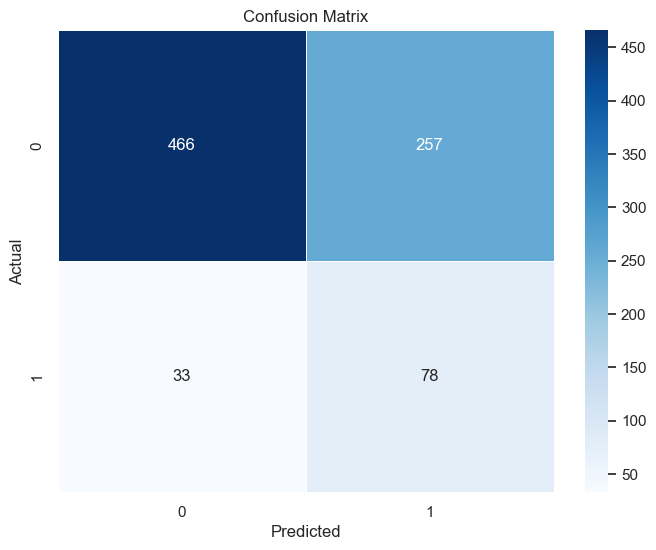

------------------------------------
Testing Accuracy for Our Classifier: 65.23%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

       False       0.93      0.64      0.76       723
        True       0.23      0.70      0.35       111

    accuracy                           0.65       834
   macro avg       0.58      0.67      0.56       834
weighted avg       0.84      0.65      0.71       834



In [589]:
#Confusion Matrix
confusion_matrix_custom(pipeline_lr, X_test, y_test)

Train AUC: 0.7787660949087766
Test AUC: 0.7516354528802662
------------------------------------


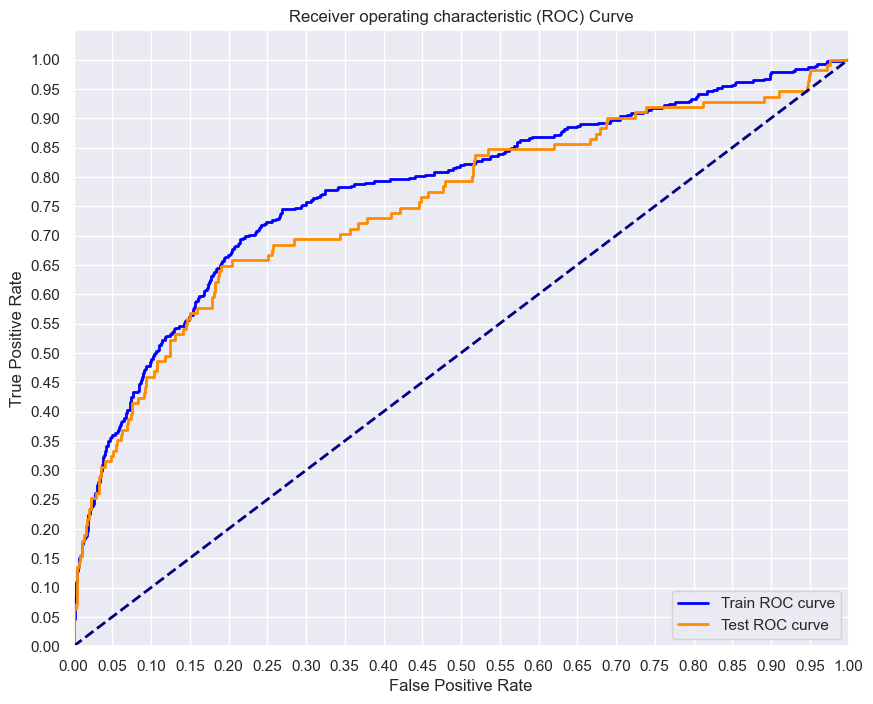

In [590]:
#ROC Curve
plot_roc(pipeline_lr, X_train, X_test, y_train, y_test)

In [591]:
evaluation_metrics(y_test, y_pred)

              precision    recall  f1-score   support

       False       0.95      0.98      0.96       723
        True       0.86      0.63      0.73       111

    accuracy                           0.94       834
   macro avg       0.90      0.81      0.85       834
weighted avg       0.93      0.94      0.93       834

---------------------------------------------------
Precision score for this model is: 0.8641975308641975
Recall score for this model is: 0.6306306306306306
Accuracy score for this model is: 0.9376498800959233
F1 score for this model is: 0.7291666666666666


**Model Tuning**

Class Imbalance

Our base model needs improvement regarding predicting 1s. In order to fix this problem, we will address class imbalance. We can use SMOTE or we can use sampling methods.

In [592]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)
# Initiate sampling class
oversample = RandomOverSampler(sampling_strategy='minority', random_state=123)
# Fit and apply the transform
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)
# Summarize class distribution
print(Counter(y_train_over))
print('------------------------------------')
# Fit our model
pipeline_lr.fit(X_train_over, y_train_over)
print('Train Score:', pipeline_lr.score(X_train_over, y_train_over))
print('Test Score:', pipeline_lr.score(X_test, y_test))

Counter({False: 2127, True: 2127})
------------------------------------
Train Score: 0.61212976022567
Test Score: 0.6474820143884892


In [593]:
from imblearn.over_sampling import SMOTE
#SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize SMOTE with the desired sampling strategy
smote = SMOTE(sampling_strategy=0.7)

# Use fit_resample instead of fit_sample
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())

-----------------------------------------
Synthetic sample class distribution: 

churn
False    2127
True     1488
Name: count, dtype: int64


In [594]:
lr_smote = LogisticRegression(fit_intercept=False, 
                           C=10e16,  
                           solver='liblinear', 
                           max_iter=10000, 
                           random_state=123) 

lr_smote.fit(X_train_resampled, y_train_resampled)

print('Train Score:', pipeline_lr.score(X_train_resampled, y_train_resampled))
print('Test Score:', pipeline_lr.score(X_test, y_test))

Train Score: 0.5883817427385892
Test Score: 0.8669064748201439


***KNN  Model***



In [595]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=23)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_clf = KNeighborsClassifier(n_neighbors=5)

# Fit the model

knn_clf.fit(X_train_scaled, y_train)

print('Train Score:', knn_clf.score(X_train_scaled, y_train))
print('Test Score:', knn_clf.score(X_test_scaled, y_test))

Train Score: 0.9019607843137255
Test Score: 0.8669064748201439


In [596]:
model_predictions(knn_clf, X_train_scaled, X_test_scaled, y_train, y_test)

Training Values 
 churn
0    2254
1     245
Name: count, dtype: int64
------------------------------------
Training Accuracy 
 churn
0    0.901961
1    0.098039
Name: proportion, dtype: float64



Testing Values:  
 churn
0    723
1    111
Name: count, dtype: int64
------------------------------------
Testing Accuracy:  
 churn
0    0.866906
1    0.133094
Name: proportion, dtype: float64


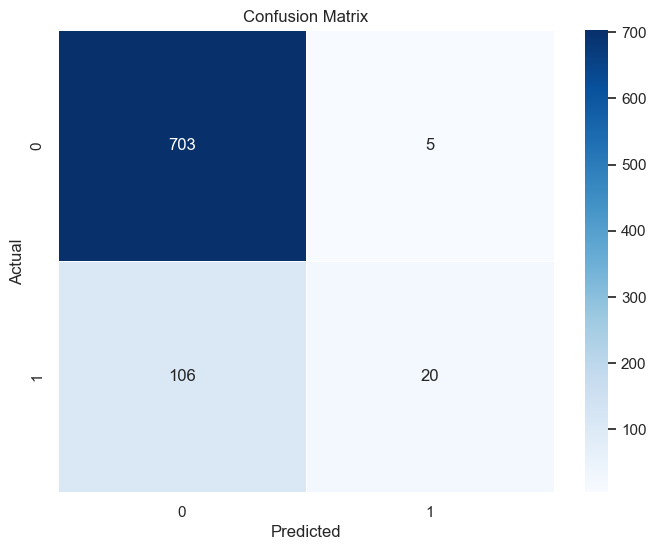

------------------------------------
Testing Accuracy for Our Classifier: 86.69%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

       False       0.87      0.99      0.93       708
        True       0.80      0.16      0.26       126

    accuracy                           0.87       834
   macro avg       0.83      0.58      0.60       834
weighted avg       0.86      0.87      0.83       834



In [597]:
#Confusion Matrix
confusion_matrix_custom(knn_clf, X_test_scaled, y_test)

Train AUC: 0.5749522031034635
Test AUC: 0.6007645054255224
------------------------------------


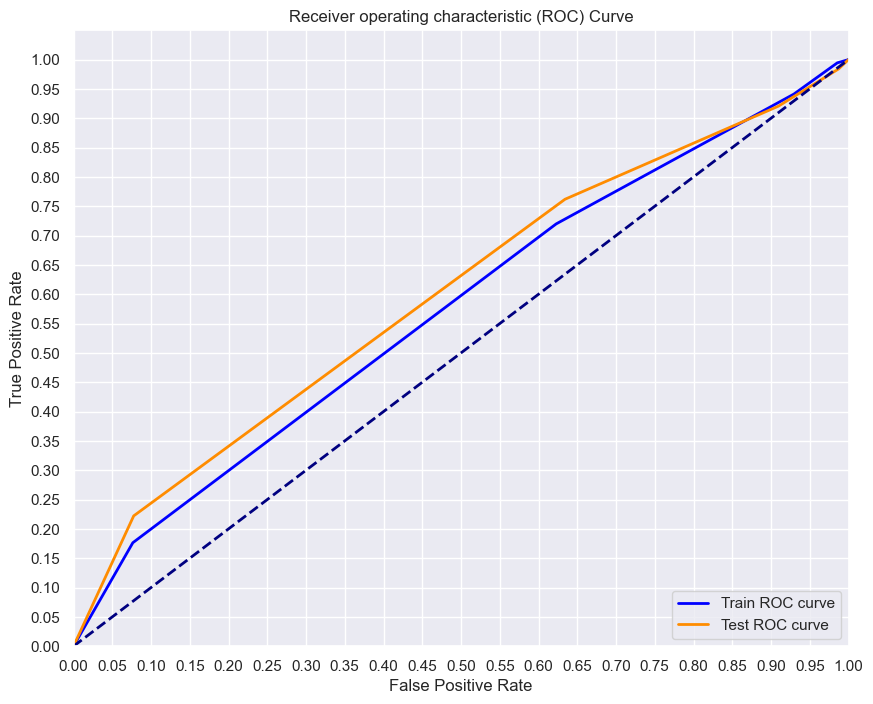

In [598]:
#ROC Curve
plot_roc_pp(knn_clf, X_train, X_test, y_train, y_test)

In [521]:
#GridSearch
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=23)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_clf_gs = KNeighborsClassifier()

knn_grid = {'n_neighbors': [3, 5, 7, 9],
            'weights':['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan'],
            'n_jobs': [-1]}

knn_gridsearch = GridSearchCV(estimator=knn_clf_gs, 
                              param_grid=knn_grid, 
                              cv=5,
                              return_train_score=True)



# Fit to the data
knn_gridsearch.fit(X_train_scaled, y_train)

# Best parameters for our Decision Tree model:
print('Best parameters for Our KNN Model:')
knn_gridsearch.best_params_

Best parameters for Our KNN Model:


{'metric': 'manhattan', 'n_jobs': -1, 'n_neighbors': 7, 'weights': 'uniform'}

In [526]:
knn_clf_gs = KNeighborsClassifier(metric='manhattan', 
                                  n_jobs=-1, 
                                  n_neighbors=7, 
                                  weights='uniform')

knn_clf_gs.fit(X_train_scaled, y_train)

print('Train Score:', knn_clf_gs.score(X_train_scaled, y_train))
print('Test Score:', knn_clf_gs.score(X_test_scaled, y_test))

Train Score: 0.8475390156062425
Test Score: 0.8609112709832134


**DECISION TREES Model**

In [547]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)

"""
    We will use StandardScaler to scale our training data.
    Set random_state to 123 for our Decision Tree model. 
"""


scaler = StandardScaler()
model = DecisionTreeClassifier(random_state=123)                       

pipeline_dt = Pipeline([('ss', scaler), 
                        ('m', model), 
                       ])

# Fit the model

pipeline_dt.fit(X_train, y_train)

print('Train Score:', pipeline_dt.score(X_train, y_train))
print('Test Score:', pipeline_dt.score(X_test, y_test))

Train Score: 1.0
Test Score: 0.919664268585132


In [530]:
"""from sklearn.linear_model import LogisticRegression
# Fit a model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
logreg.fit(X_train, y_train)
print(logreg) # Preview model params

# Predict
y_hat_test = logreg.predict(X_test)

# Data preview
print("")
df.head()
"""

'from sklearn.linear_model import LogisticRegression\n# Fit a model\nlogreg = LogisticRegression(fit_intercept=False, C=1e12, solver=\'liblinear\')\nlogreg.fit(X_train, y_train)\nprint(logreg) # Preview model params\n\n# Predict\ny_hat_test = logreg.predict(X_test)\n\n# Data preview\nprint("")\ndf.head()\n'

Model Evaluation
Now that we have a model, lets take a look at how it performs.

Performance on Training Data
First, how does it perform on the training data?

In the cell below, 0 means the prediction and the actual value matched, whereas 1 means the prediction and the actual value did not match.

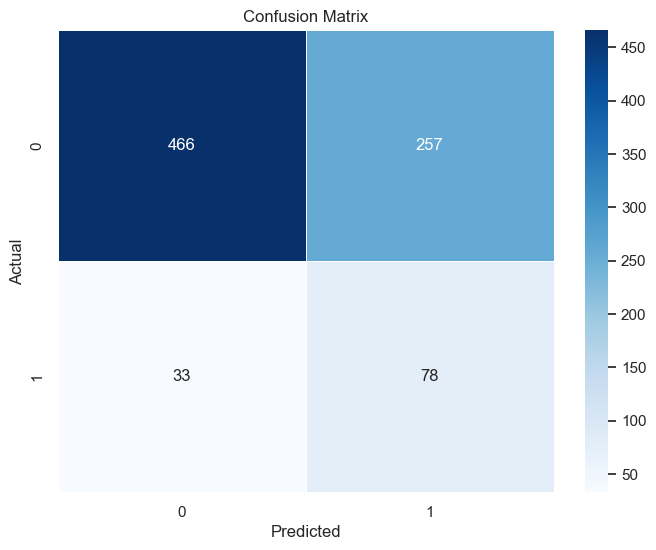

------------------------------------
Testing Accuracy for Our Classifier: 65.23%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

       False       0.93      0.64      0.76       723
        True       0.23      0.70      0.35       111

    accuracy                           0.65       834
   macro avg       0.58      0.67      0.56       834
weighted avg       0.84      0.65      0.71       834



In [548]:
#Confusion Matrix 
confusion_matrix_custom(pipeline_lr, X_test, y_test)

Train AUC: 0.6517325884602208
Test AUC: 0.6797708725674828
------------------------------------


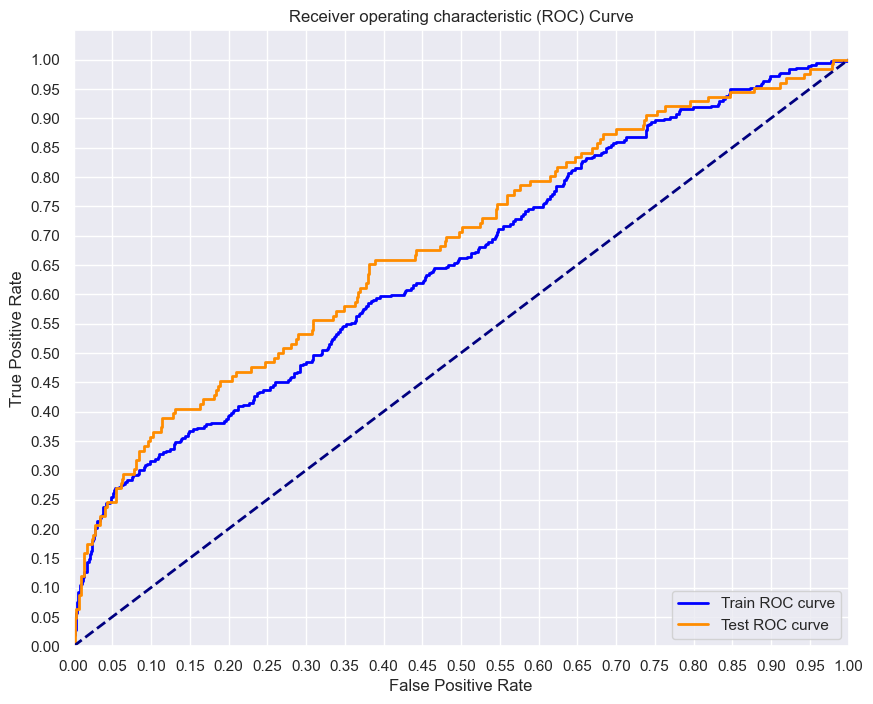

In [601]:
plot_roc_pp(pipeline_lr, X_train, X_test, y_train, y_test)

### Performance on Test Data

Now let's apply the same preprocessing process to our test data, so we can evaluate the model's performance on unseen data.

In [531]:
#Model Control Function
def model_control(model, X_train, X_test, y_train, y_test):

    """
    This function includes all the functions we created above.
    ROC Curve has decision_function attribute.
    """

    model.fit(X_train, y_train)
    print('Train Score:', model.score(X_train, y_train))
    print('Test Score:', model.score(X_test, y_test))
    print('------------------------------------')

    model_predictions(model, X_train, X_test, y_train, y_test)
    confusion_matrix(model, X_test, y_test)
    plot_roc(model, X_train, X_test, y_train, y_test)

In [534]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [535]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_dist,
    n_iter=10,  # Adjust the number of iterations as needed
    cv=3,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,  # Use all available cores
)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)



Best Hyperparameters: {'n_estimators': 10, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': None, 'bootstrap': False}


In [536]:
# Get the best hyperparameters
best_params = random_search.best_params_

# Train the model with the best hyperparameters
best_rf_model = RandomForestClassifier(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Model Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Best Hyperparameters: {'n_estimators': 10, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': None, 'bootstrap': False}
Model Accuracy: 0.9376498800959233
Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.98      0.96       723
        True       0.86      0.63      0.73       111

    accuracy                           0.94       834
   macro avg       0.90      0.81      0.85       834
weighted avg       0.93      0.94      0.93       834



In [454]:
#Predictions
# We will use our model_predictions function to check the accuracy of predicting each class for both our train and test datasets.
model_predictions(best_rf_model,X_train, X_test, y_train, y_test)

Training Values 
 churn
0    2394
1     105
Name: count, dtype: int64
------------------------------------
Training Accuracy 
 churn
0    0.957983
1    0.042017
Name: proportion, dtype: float64



Testing Values:  
 churn
0    769
1     65
Name: count, dtype: int64
------------------------------------
Testing Accuracy:  
 churn
0    0.922062
1    0.077938
Name: proportion, dtype: float64


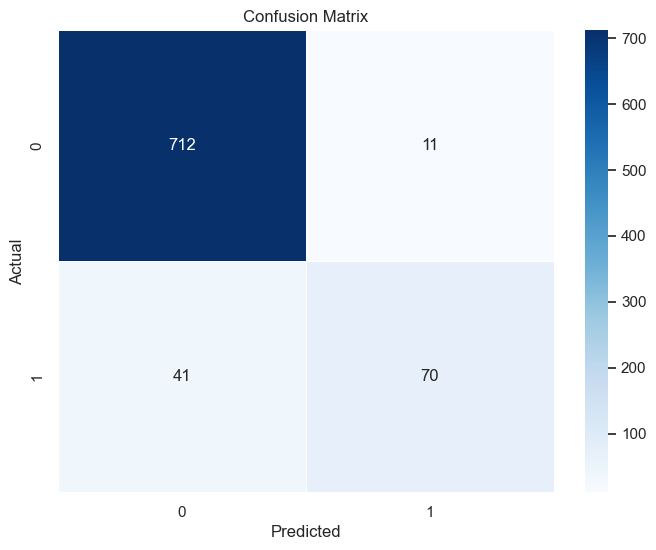

------------------------------------
Testing Accuracy for Our Classifier: 93.76%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

       False       0.95      0.98      0.96       723
        True       0.86      0.63      0.73       111

    accuracy                           0.94       834
   macro avg       0.90      0.81      0.85       834
weighted avg       0.93      0.94      0.93       834



In [549]:
confusion_matrix_custom(best_rf_model, X_test, y_test)

Train AUC: 0.9803136941050931
Test AUC: 0.9901185992287688
------------------------------------


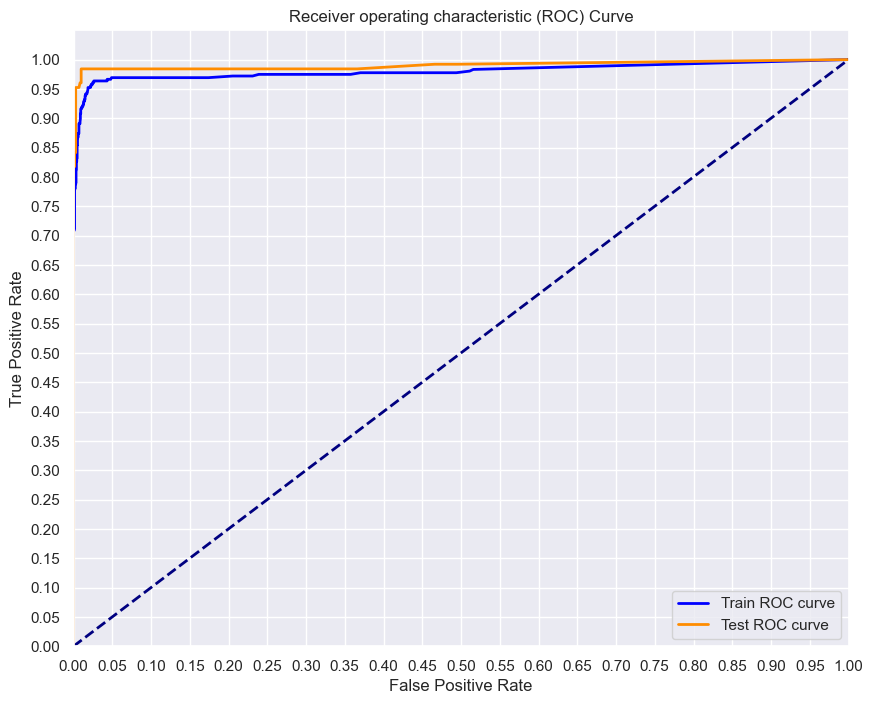

In [600]:
plot_roc_pp(best_rf_model, X_train, X_test, y_train, y_test)